### content
- There is a need for a used car price prediction system to effectively determine the worth of the car   by using a variety of features.
- To be able to predict used cars market value can help both buyers and sellers. 
- It contains most of relevant parameters
- 1.Name
- 2.Location
- 3.Year
- 4.Kilometers_Driven
- 5.Fuel_Type
- 6.Transmission
- 7.Owner_Type
- 8.Mileage
- 9.Engine
- 10.Power	
- 11.Seats
- 12.New_Price
- 13.Price

In [476]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')


#Importing regular expression
import re

In [477]:
#We have train and Test data
df_train=pd.read_csv(r"C:\Users\CHANDANA\Downloads\datasets_245550_518431_train-data.csv")
df_test=pd.read_csv(r"C:\Users\CHANDANA\Downloads\datasets_245550_518431_test-data.csv")

In [478]:
#Now we just look into train and test data
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [479]:
df_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [480]:
#Information about the training data
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [481]:
#Shape of training data 
print("Shape of training data:",df_train.shape)

Shape of training data: (6019, 14)


In [482]:
#Checking the NULL values
df_train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [483]:
# Checking the null_values and their percentages in both Train and test data

missing_values=df_train.isnull().sum()
missing_values.sort_values(inplace=True,ascending=False)
percent=round(((df_train.isnull().sum()/df_train.index.size)*100),2)
pd.concat([missing_values,percent],keys=(['missing_values','percent']),axis=1)

,missing_values,percent
New_Price,5195,86.31
Seats,42,0.70
Power,36,0.60
Engine,36,0.60
Mileage,2,0.03
Price,0,0.00
Owner_Type,0,0.00
Transmission,0,0.00
Fuel_Type,0,0.00
Kilometers_Driven,0,0.00


In [484]:
missing_values=df_test.isnull().sum()
missing_values.sort_values(inplace=True,ascending=False)
percent=round(((df_test.isnull().sum()/df_test.index.size)*100),2)
pd.concat([missing_values,percent],keys=(['missing_values','percent']),axis=1)

,missing_values,percent
New_Price,1052,85.25
Seats,11,0.89
Power,10,0.81
Engine,10,0.81
Mileage,0,0.00
Owner_Type,0,0.00
Transmission,0,0.00
Fuel_Type,0,0.00
Kilometers_Driven,0,0.00
Year,0,0.00



### Data cleaning

- From the above the dataset contains null values for the columns
- New_Price	
- Seats	
- Power	
- Engine	
- Mileage	



In [485]:
## Removing Unwanted columns in both train and test
df_train.drop(['Unnamed: 0'],axis=1,inplace=True)
df_test.drop(['Unnamed: 0'],axis=1,inplace=True)

In [486]:
# Removing 'New_Price' column as it has more nulll_Values
df_train.drop(['New_Price'],axis=1,inplace=True)
df_test.drop(['New_Price'],axis=1,inplace=True)

In [487]:
#Removing rows which has null values
df_train.dropna(axis=0,how='any',inplace=True)
df_test.dropna(axis=0,how='any',inplace=True)

In [488]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [489]:

df_train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [490]:
df_test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [491]:
df_train['Seats'].value_counts()

5.0     5012
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [492]:
print(df_train['Seats'].unique())


[ 5.  7.  8.  4.  6.  2. 10.  9.  0.]


In [493]:
# Seats  column has values Zero so replacing it with mode.
print('Mode of seats column of training data:',df_train['Seats'].mode())


Mode of seats column of training data: 0    5.0
dtype: float64


In [494]:
fil = (df_train['Seats'] ==0.0)
df_train.loc[fil, 'Seats'] = 5.0


In [495]:
# After replacing with mode 
print(df_train['Seats'].unique())


[ 5.  7.  8.  4.  6.  2. 10.  9.]


In [496]:
df_train['Seats'].value_counts()

5.0     5013
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
Name: Seats, dtype: int64

In [497]:
# Removing km/kg and converting  into float for both  train and test data
df_train['Mileage'] = df_train['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', 
                                                                 r'\1', str(x)))
df_train['Mileage'] = df_train['Mileage'].astype(float)
df_train['Mileage']

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage, Length: 5975, dtype: float64

In [498]:
df_test['Mileage'] = df_test['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', 
                                                                 r'\1', str(x)))
df_test['Mileage'] = df_test['Mileage'].astype(float)
df_test['Mileage']

0       32.26
1       24.70
2       13.68
3       23.59
4       18.50
        ...  
1229    20.54
1230    17.21
1231    23.08
1232    17.20
1233    10.00
Name: Mileage, Length: 1223, dtype: float64

In [499]:
# Converting seats column to float
df_train['Seats']=df_train['Seats'].astype(float)
df_test['Seats']=df_test['Seats'].astype(float)

In [500]:
# Removing CC and converting  into float for both  train and test data
df_train['Engine'] =df_train['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_train['Engine']=df_train['Engine'].astype(float)
df_train['Engine']

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
6014    1248.0
6015    1120.0
6016    2498.0
6017     998.0
6018     936.0
Name: Engine, Length: 5975, dtype: float64

In [501]:
df_test['Engine'] =df_test['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_test['Engine']=df_test['Engine'].astype(float)
df_test['Engine']

0        998.0
1        796.0
2       2393.0
3       1364.0
4       1197.0
         ...  
1229    1598.0
1230    1197.0
1231    1461.0
1232    1197.0
1233    2148.0
Name: Engine, Length: 1223, dtype: float64

In [502]:

print(len(df_train[df_train['Power'] == 'null bhp']))
df_train.drop(index=df_train[df_train['Power']=='null bhp'].index,inplace=True)
len(df_train)

103


5872

In [503]:
#Removing 'bhp' and converting into float for both train and test
df_train['Power'] = df_train['Power'].str.split(' ').str[0]
df_train['Power'] = df_train['Power'].astype(float)

In [504]:
print(len(df_test[df_test['Power'] == 'null bhp']))
df_test.drop(index=df_test[df_test['Power']=='null bhp'].index,inplace=True)
len(df_test)

22


1201

In [505]:
df_test['Power'] = df_test['Power'].str.split(' ').str[0]
df_test['Power'] = df_test['Power'].astype(float)

In [506]:
# Extracting brand names from the name column
df_train['brand_name'] = df_train['Name'].apply(lambda x: str(x).split(" ")[0])
df_train['brand_name'].unique()


array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [507]:
df_train['brand_name'].replace('Isuzu', 'ISUZU',inplace=True)

In [508]:
df_train['brand_name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [509]:
df_test['brand_name'] = df_test['Name'].apply(lambda x: str(x).split(" ")[0])
df_test['brand_name'].unique()


array(['Maruti', 'Toyota', 'Hyundai', 'Mahindra', 'Honda', 'Audi',
       'Nissan', 'BMW', 'Ford', 'Skoda', 'Volkswagen', 'Mitsubishi',
       'Mercedes-Benz', 'Tata', 'Chevrolet', 'Datsun', 'Jaguar', 'Fiat',
       'Renault', 'Mini', 'Bentley', 'Land', 'Volvo', 'Isuzu', 'Jeep',
       'Porsche', 'ISUZU', 'OpelCorsa'], dtype=object)

In [510]:
df_test['brand_name'].replace('Isuzu', 'ISUZU',inplace=True)

In [511]:
df_test['brand_name'].unique()

array(['Maruti', 'Toyota', 'Hyundai', 'Mahindra', 'Honda', 'Audi',
       'Nissan', 'BMW', 'Ford', 'Skoda', 'Volkswagen', 'Mitsubishi',
       'Mercedes-Benz', 'Tata', 'Chevrolet', 'Datsun', 'Jaguar', 'Fiat',
       'Renault', 'Mini', 'Bentley', 'Land', 'Volvo', 'ISUZU', 'Jeep',
       'Porsche', 'OpelCorsa'], dtype=object)

In [512]:
print('Location :{}'.format(df_train['Location'].unique()))
print('-'*20)
print('Type of fuel:{}'.format(df_train['Fuel_Type'].unique()))
print('-'*20)
print('Transmission:{}'.format(df_train['Transmission'].unique()))
print('-'*20)
print('Owner type:{}'.format(df_train['Owner_Type'].unique()))


Location :['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
--------------------
Type of fuel:['CNG' 'Diesel' 'Petrol' 'LPG']
--------------------
Transmission:['Manual' 'Automatic']
--------------------
Owner type:['First' 'Second' 'Fourth & Above' 'Third']


In [513]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
 12  brand_name         5872 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 642.2+ KB


In [514]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1201 non-null   object 
 1   Location           1201 non-null   object 
 2   Year               1201 non-null   int64  
 3   Kilometers_Driven  1201 non-null   int64  
 4   Fuel_Type          1201 non-null   object 
 5   Transmission       1201 non-null   object 
 6   Owner_Type         1201 non-null   object 
 7   Mileage            1201 non-null   float64
 8   Engine             1201 non-null   float64
 9   Power              1201 non-null   float64
 10  Seats              1201 non-null   float64
 11  brand_name         1201 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 122.0+ KB


In [515]:
#Removing name column
df_train.drop(['Name'],axis=1,inplace=True)
df_test.drop(['Name'],axis=1,inplace=True)


In [516]:
df_train[['Kilometers_Driven','Mileage','Engine','Power','Price']].describe()

,Kilometers_Driven,Mileage,Engine,Power,Price
count,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000
mean,5.831700e+04,18.277839,1625.745572,113.276894,9.603919
std,9.216941e+04,4.365657,601.641783,53.881892,11.249453
min,1.710000e+02,0.000000,624.000000,34.200000,0.440000
25%,3.342250e+04,15.260000,1198.000000,75.000000,3.517500
50%,5.260900e+04,18.200000,1495.500000,97.700000,5.750000
75%,7.240275e+04,21.100000,1991.000000,138.100000,10.000000
max,6.500000e+06,33.540000,5998.000000,560.000000,160.000000


In [517]:
#Numrical data
df_train_num=df_train.select_dtypes(exclude='object')
# Categorical data
df_train_cat=df_train.select_dtypes(include='object')

In [518]:
#categorical columns
df_train_cat.head()

,Location,Fuel_Type,Transmission,Owner_Type,brand_name
0,Mumbai,CNG,Manual,First,Maruti
1,Pune,Diesel,Manual,First,Hyundai
2,Chennai,Petrol,Manual,First,Honda
3,Chennai,Diesel,Manual,First,Maruti
4,Coimbatore,Diesel,Automatic,Second,Audi


In [519]:
#Numeical columns
df_train_num.head()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2010,72000,26.60,998.0,58.16,5.0,1.75
1,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,15.20,1968.0,140.80,5.0,17.74


### Data visualization

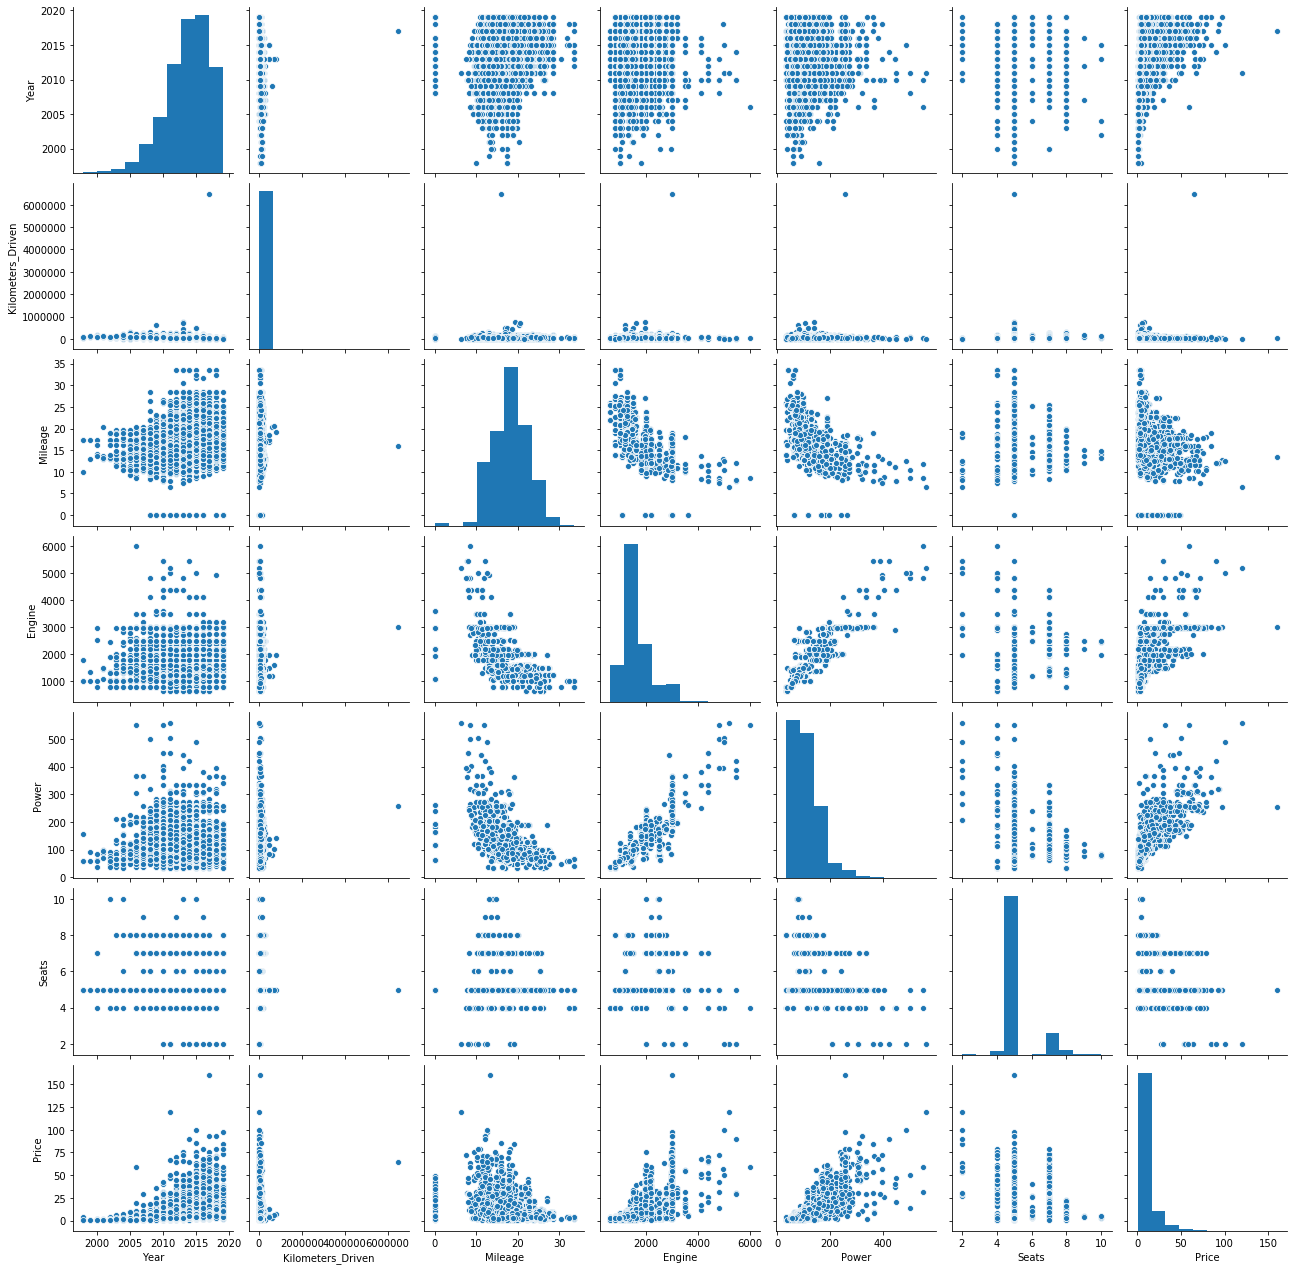

In [520]:
# Visualizing numerical data
sns.pairplot(data=df_train_num)

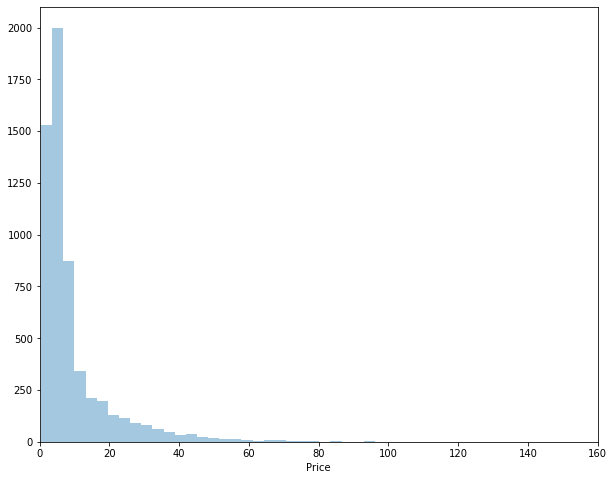

In [521]:

plt.figure(figsize=(10,8))
sns.distplot(df_train['Price'],kde=False)
plt.xlim(0,160)
plt.show()

- From above we can say that skewness is left skewed it means most of the data has been to the left side.


In [522]:
#Visualizing categoricl columns
df_train_cat

,Location,Fuel_Type,Transmission,Owner_Type,brand_name
0,Mumbai,CNG,Manual,First,Maruti
1,Pune,Diesel,Manual,First,Hyundai
2,Chennai,Petrol,Manual,First,Honda
3,Chennai,Diesel,Manual,First,Maruti
4,Coimbatore,Diesel,Automatic,Second,Audi
...,...,...,...,...,...
6014,Delhi,Diesel,Manual,First,Maruti
6015,Jaipur,Diesel,Manual,First,Hyundai
6016,Jaipur,Diesel,Manual,Second,Mahindra
6017,Kolkata,Petrol,Manual,First,Maruti


In [523]:
df_train['brand_name'].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               3
Lamborghini         1
Bentley             1
Ambassador          1
Name: brand_name, dtype: int64

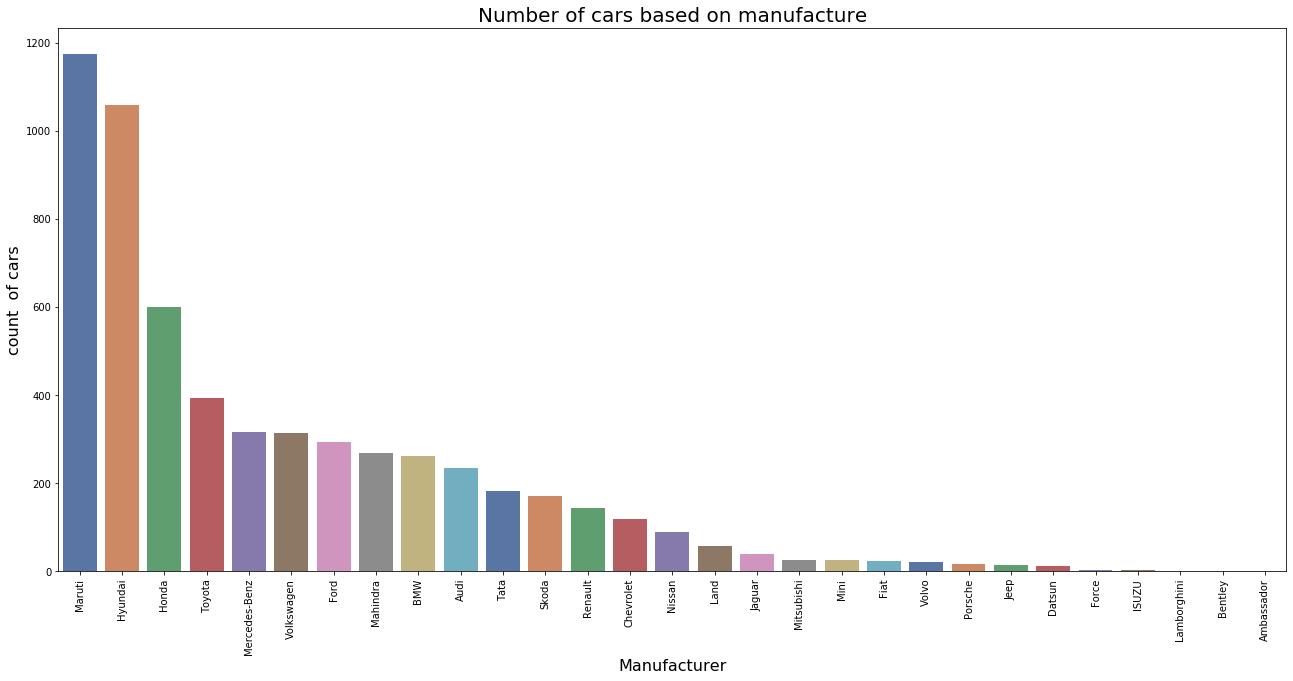

In [524]:
 plt.figure(figsize=(22, 10))
 ax = sns.countplot(x=df_train['brand_name'], data=df_train, order = df_train['brand_name'].value_counts().index,palette="deep")
 ax.set_title(label='Number of cars based on manufacture', fontsize=20)
 ax.set_xlabel(xlabel='Manufacturer', fontsize=16)
 ax.set_ylabel(ylabel='count  of cars', fontsize=16)
 plt.xticks(rotation=90)
 plt.show()



- From the above plot Maruti is leading carbrand followed by Hyundai.
- Ambassador has less when compared to all.

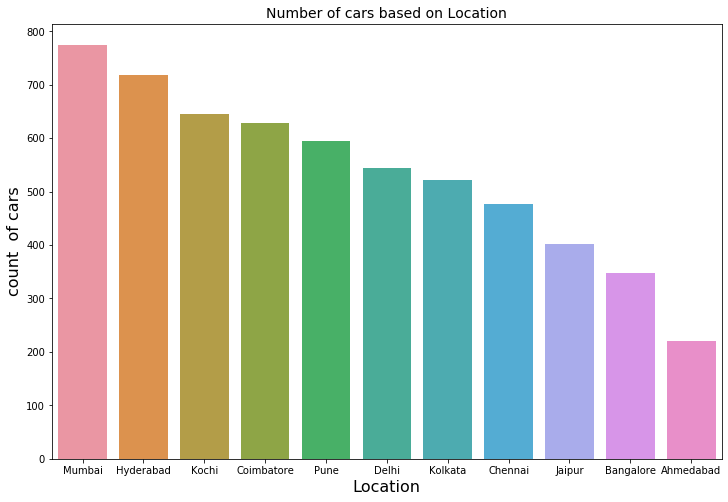

In [525]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x=df_train['Location'],data=df_train,order=df_train['Location'].value_counts().index)
ax.set_title(label='Number of cars based on Location', fontsize=14)
ax.set_xlabel(xlabel='Location', fontsize=16)
ax.set_ylabel(ylabel='count  of cars', fontsize=16)
plt.show()


- From the above we can see Mumbai has more sales followed by Hyderabad.
- Ahmedabad has less sales when compared to all.


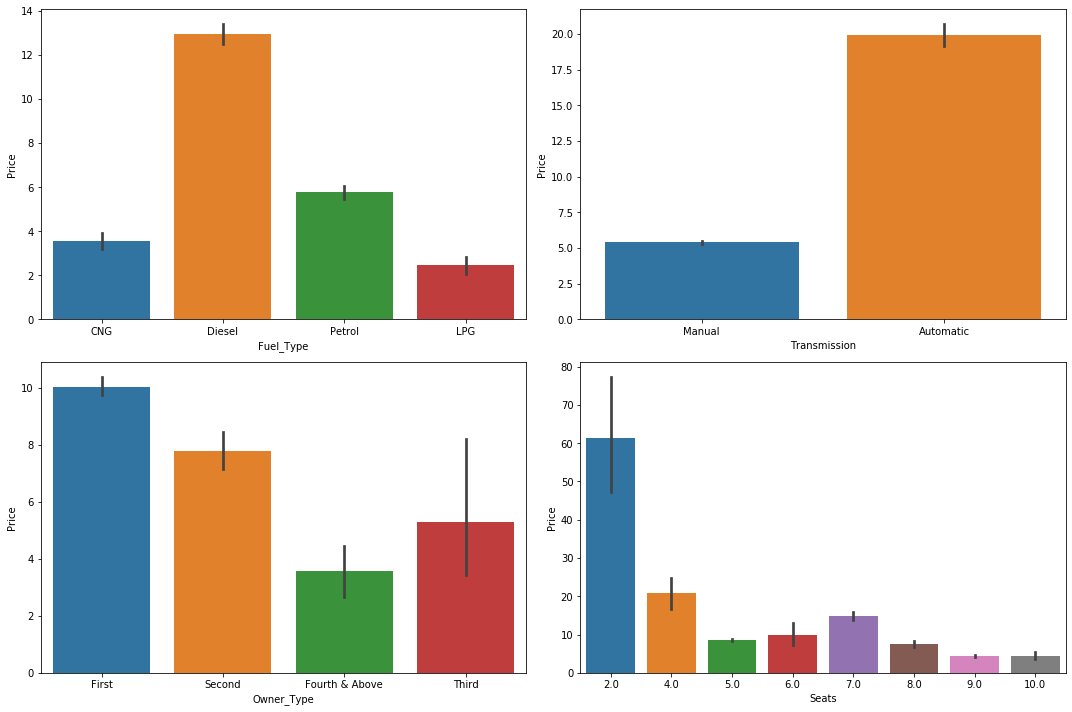

In [526]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.barplot(x='Fuel_Type',y='Price',data=df_train,)
plt.subplot(2,2,2)
sns.barplot(x='Transmission',y='Price',data=df_train)

plt.subplot(2, 2, 3)
sns.barplot(x='Owner_Type',y='Price',data=df_train)
plt.subplot(2, 2, 4)
sns.barplot(x='Seats',y='Price',data=df_train)
plt.tight_layout()
plt.show()




- The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as CNG.
- Automatic gear transmission has more expensive than manual.
- First owner_Type cars are relatively high when compared to all.

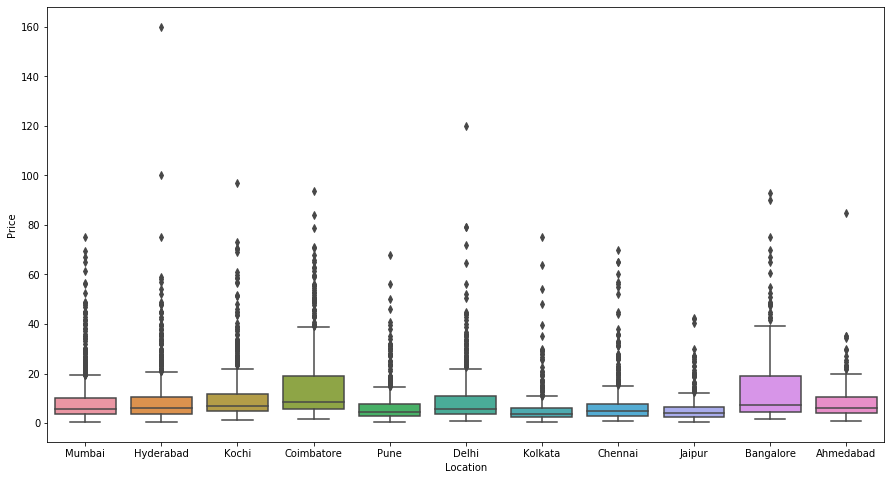

In [527]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Location',y='Price',data=df_train,order=df_train['Location'].value_counts().index)

- Cars in Banglore are more expensive followed by Coimbatore.

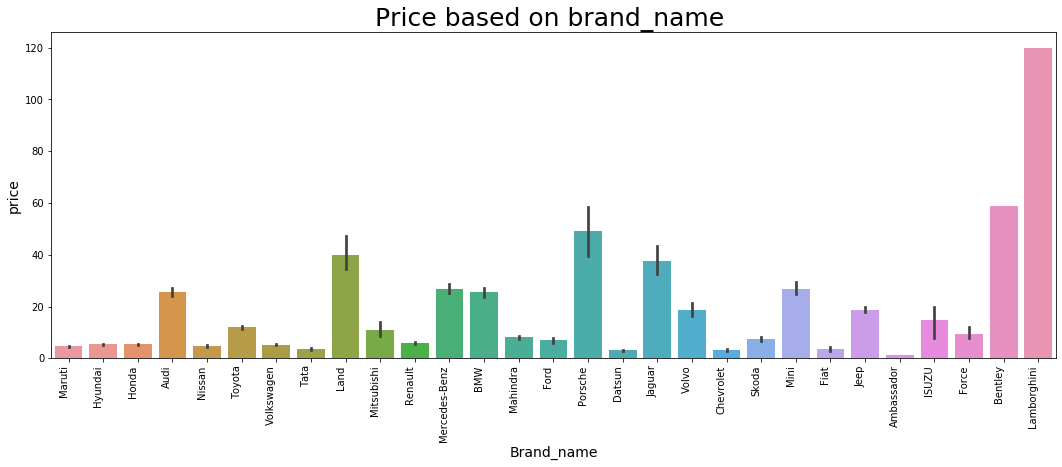

In [528]:
plt.figure(figsize=(18,6))
sns.barplot(x=df_train['brand_name'],y=df_train['Price'])
plt.xticks(rotation=90,ha='right')
plt.title("Price based on brand_name ",fontsize=25)
plt.ylabel("price",fontsize=14)
plt.xlabel("Brand_name",fontsize=14)
plt.show()

- The cars with brand_name Lamborghini is more expensive.
- Maruthi car prices are relatuvely very less.

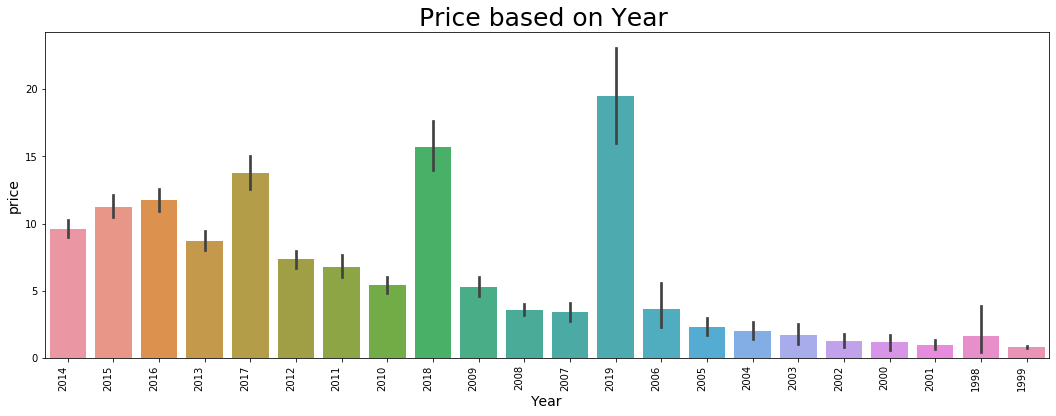

In [529]:
plt.figure(figsize=(18,6))
sns.barplot(x=df_train['Year'],y=df_train['Price'],data=df_train,order=df_train['Year'].value_counts().index)
plt.xticks(rotation=90,ha='right')
plt.title("Price based on Year ",fontsize=25)
plt.ylabel("price",fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.show()

- We can  see that the  cars mostly sold are from the year 2019,2018,2017.

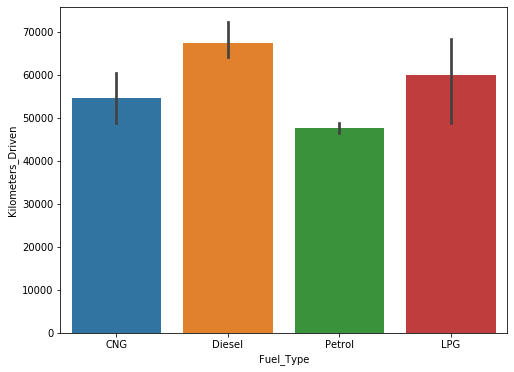

In [530]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_train['Fuel_Type'],y=df_train['Kilometers_Driven'],data=df_train)
plt.show()


- We can see that the cars with fuel_Type Diesel  are exceeding 50000 kilometer usage.

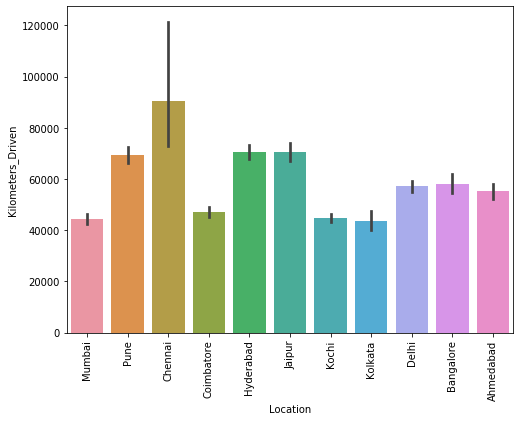

In [531]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_train['Location'],y=df_train['Kilometers_Driven'],data=df_train)
plt.xticks(rotation=90)
plt.show()


- The cars in different cities are not sold with different kilometers.

### Working with categorical data.

In [532]:
df_train_cat.head()

,Location,Fuel_Type,Transmission,Owner_Type,brand_name
0,Mumbai,CNG,Manual,First,Maruti
1,Pune,Diesel,Manual,First,Hyundai
2,Chennai,Petrol,Manual,First,Honda
3,Chennai,Diesel,Manual,First,Maruti
4,Coimbatore,Diesel,Automatic,Second,Audi


In [533]:
df_train_cat.columns

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'brand_name'], dtype='object')

In [534]:
# Owner_Type column has ordered data so we will be replacing with numbers.
df_train['Owner_Type'].replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
df_train.head()



,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand_name
0,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74,Audi


### One-hot encoding.

In [535]:
dummies=pd.get_dummies(data=df_train_cat,columns=['Location','Fuel_Type','Transmission'])

dummies.shape

(5872, 19)

In [536]:
# After using drop_first.
dummies=pd.get_dummies(data=df_train_cat,columns=['Location','Fuel_Type','Transmission'],drop_first=True)
dummies.shape

(5872, 16)

In [537]:
df_train=pd.concat([df_train,dummies],axis=1)
df_train.shape

(5872, 28)

In [538]:
df_train=df_train.select_dtypes(exclude='object')
df_train.shape

(5872, 22)

In [539]:
df_train.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,26.60,998.0,58.16,5.0,1.75,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,19.67,1582.0,126.20,5.0,12.50,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,18.20,1199.0,88.70,5.0,4.50,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,20.77,1248.0,88.76,7.0,6.00,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,15.20,1968.0,140.80,5.0,17.74,0,0,...,0,0,0,0,0,0,1,0,0,0


In [540]:
df_test_num=df_test.select_dtypes(exclude='object')
df_test_cat=df_test.select_dtypes(include='object')

In [541]:
df_test_cat

,Location,Fuel_Type,Transmission,Owner_Type,brand_name
0,Delhi,CNG,Manual,First,Maruti
1,Coimbatore,Petrol,Manual,Second,Maruti
2,Mumbai,Diesel,Manual,First,Toyota
4,Mumbai,Petrol,Manual,First,Hyundai
5,Coimbatore,Diesel,Manual,Second,Mahindra
...,...,...,...,...,...
1229,Hyderabad,Diesel,Manual,First,Volkswagen
1230,Mumbai,Petrol,Automatic,First,Volkswagen
1231,Kolkata,Diesel,Manual,First,Nissan
1232,Pune,Petrol,Automatic,Third,Volkswagen


In [542]:
df_test['Owner_Type'].replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
df_test.head()


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,brand_name
0,Delhi,2014,40929,CNG,Manual,1,32.26,998.0,58.20,4.0,Maruti
1,Coimbatore,2013,54493,Petrol,Manual,2,24.70,796.0,47.30,5.0,Maruti
2,Mumbai,2017,34000,Diesel,Manual,1,13.68,2393.0,147.80,7.0,Toyota
4,Mumbai,2014,29000,Petrol,Manual,1,18.50,1197.0,82.85,5.0,Hyundai
5,Coimbatore,2016,85609,Diesel,Manual,2,16.00,2179.0,140.00,7.0,Mahindra


In [543]:
dummies=pd.get_dummies(data=df_test_cat,columns=['Location','Fuel_Type','Transmission'])
dummies.shape

(1201, 19)

In [544]:
dummies=pd.get_dummies(data=df_test_cat,columns=['Location','Fuel_Type','Transmission'],drop_first=True)
dummies.shape

(1201, 16)

In [545]:
df_test=pd.concat([df_test,dummies],axis=1)
df_test.shape

(1201, 27)

In [546]:
df_test=df_test.select_dtypes(exclude='object')
df_test.shape

(1201, 21)

In [547]:
df_test.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,40929,1,32.26,998.0,58.20,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2013,54493,2,24.70,796.0,47.30,5.0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,2017,34000,1,13.68,2393.0,147.80,7.0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,2014,29000,1,18.50,1197.0,82.85,5.0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
5,2016,85609,2,16.00,2179.0,140.00,7.0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


### Build a model

In [548]:
df_train.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,26.60,998.0,58.16,5.0,1.75,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,19.67,1582.0,126.20,5.0,12.50,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,18.20,1199.0,88.70,5.0,4.50,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,20.77,1248.0,88.76,7.0,6.00,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,15.20,1968.0,140.80,5.0,17.74,0,0,...,0,0,0,0,0,0,1,0,0,0


In [549]:
X=df_train.drop(columns=['Price'])
X.shape

(5872, 21)

In [550]:
y=df_train['Price']

In [551]:
y.shape

(5872,)

In [552]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)


### Feature scaling

In [553]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### First,we will try with Linear Regression

In [554]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)


In [555]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.6991016530827006

In [556]:
mean_squared_error(y_test,y_pred)

35.26240354856316

- Not a good accuracy

### Lets try with Random forest for more accuracy

In [557]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [558]:
r2_score(y_test,y_pred_rf)

0.9104633297016597

In [559]:
mean_squared_error(y_test,y_pred_rf)

10.492839966723011

- Good accuracy

### Now lets check with Decision Tree

In [567]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)


In [568]:
r2_score(y_test,y_pred_dt)

0.8480426823088539

In [569]:
mean_squared_error(y_test,y_pred_dt)

17.807941829787236

### XG boost Regressor

In [570]:
from xgboost.sklearn import XGBRegressor
xg=XGBRegressor()
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)


In [571]:
r2_score(y_test,y_pred_xg)

0.9194261539963965

In [572]:
mean_squared_error(y_test,y_pred_xg)

9.442482826333869

### Random forest and XG boost gives good accuracy 

In [574]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)


In [575]:
r2_score(y_test,y_pred_gb)

0.8958386896763304

In [576]:
ab=GradientBoostingRegressor()
ab.fit(X_train,y_train)
y_pred_ab=ab.predict(X_test)


In [577]:
r2_score(y_test,y_pred_ab)

0.8933063030041778

# Predictions

In [579]:
df_train.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,26.60,998.0,58.16,5.0,1.75,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,19.67,1582.0,126.20,5.0,12.50,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,18.20,1199.0,88.70,5.0,4.50,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,20.77,1248.0,88.76,7.0,6.00,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,15.20,1968.0,140.80,5.0,17.74,0,0,...,0,0,0,0,0,0,1,0,0,0


In [580]:
df_test.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,40929,1,32.26,998.0,58.20,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2013,54493,2,24.70,796.0,47.30,5.0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,2017,34000,1,13.68,2393.0,147.80,7.0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,2014,29000,1,18.50,1197.0,82.85,5.0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
5,2016,85609,2,16.00,2179.0,140.00,7.0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [581]:
df_test=sc.fit_transform(df_test)


In [582]:
y_pred_1=xg.predict(df_test)

In [583]:
np.array(y_pred_1)

array([ 3.7854583,  2.8290606, 17.000525 , ...,  3.9097857,  4.393127 ,
       13.297491 ], dtype=float32)

In [584]:
predictions=pd.DataFrame(y_pred_1)

In [585]:
predictions

,0
0,3.785458
1,2.829061
2,17.000525
3,4.850915
4,13.565829
...,...
1196,4.004702
1197,6.651010
1198,3.909786
1199,4.393127


In [586]:
predictions.to_csv('predicted_values')

In [587]:
df_test

array([[ 0.16344438, -0.48078131, -0.42098005, ..., -0.04084185,
        -0.9378162 ,  0.6065324 ],
       [-0.16047757, -0.09799875,  1.80631968, ..., -0.04084185,
         1.06630703,  0.6065324 ],
       [ 1.1352102 , -0.67632101, -0.42098005, ..., -0.04084185,
        -0.9378162 ,  0.6065324 ],
       ...,
       [-0.48439951, -0.84564388, -0.42098005, ..., -0.04084185,
        -0.9378162 ,  0.6065324 ],
       [-0.16047757, -0.16095863,  4.03361941, ..., -0.04084185,
         1.06630703, -1.64871655],
       [ 0.16344438,  0.40855884, -0.42098005, ..., -0.04084185,
        -0.9378162 , -1.64871655]])